In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
#from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/diabetes.csv")

In [4]:
print (dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
print((dataset == 0).sum(axis=0))

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


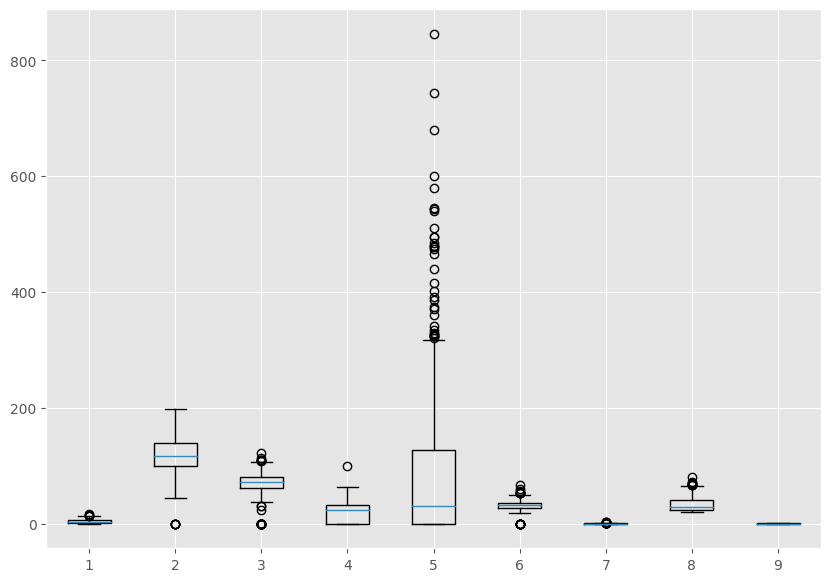

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(dataset)

# show plot
plt.show()

In [ ]:
import statsmodels.api as sm
import pylab as py

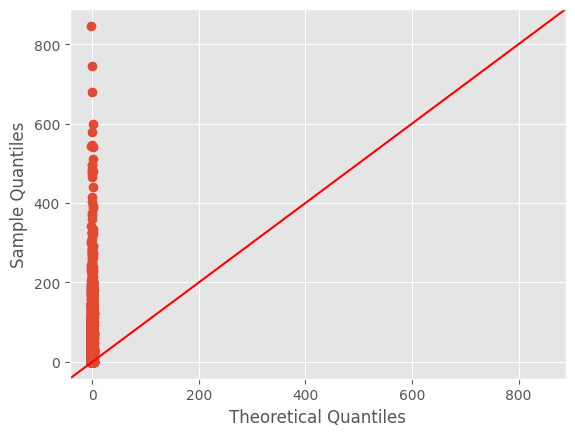

In [ ]:
sm.qqplot(dataset, line ='45')
py.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
plt.show()

TypeError: ignored

In [17]:
dataset.iloc[:,1:5] = dataset.iloc[:,1:5].replace(0, np.nan)

In [18]:
data = dataset.values
# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(data)
# count the number of NaN values in each column
print('Missing: %d' % np.isnan(transformed_values).sum())

Missing: 0


In [19]:
data.shape

(768, 9)

In [ ]:
transformed_values.shape

(768, 9)

In [20]:
scaler = StandardScaler()
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df=dataset.iloc[:,0:-1]
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=col_names)


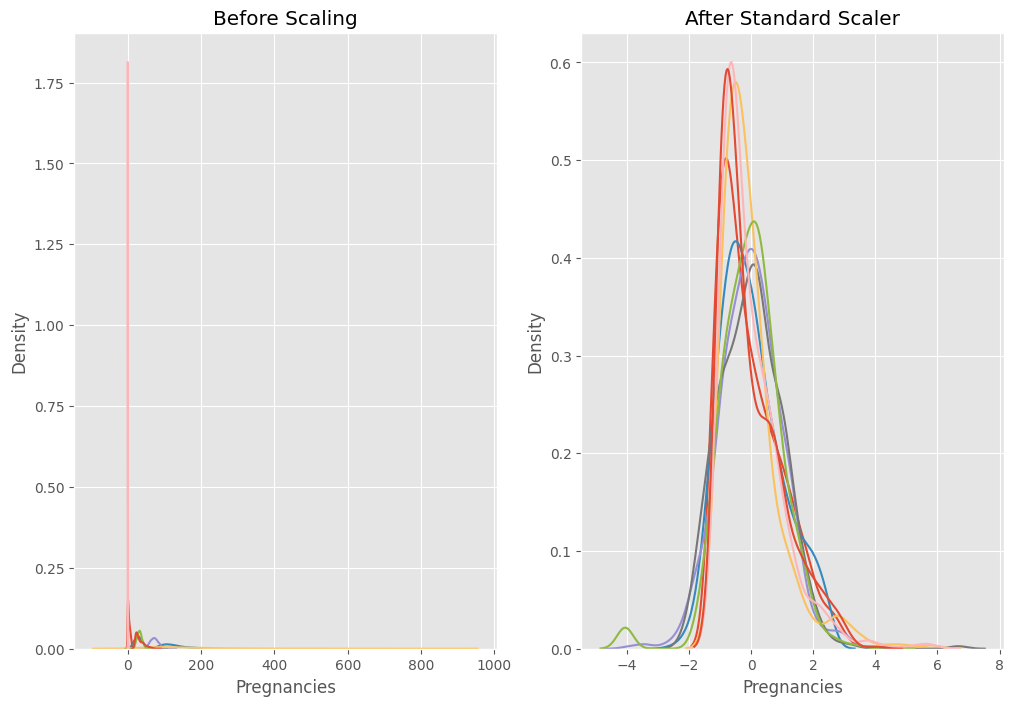

In [21]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Pregnancies'], ax=ax1)
sns.kdeplot(df['Glucose'], ax=ax1)
sns.kdeplot(df['BloodPressure'], ax=ax1)
sns.kdeplot(df['SkinThickness'], ax=ax1)
sns.kdeplot(df['Insulin'], ax=ax1)
sns.kdeplot(df['BMI'], ax=ax1)
sns.kdeplot(df['DiabetesPedigreeFunction'], ax=ax1)
sns.kdeplot(df['Age'], ax=ax1)



ax2.set_title('After Standard Scaler')

sns.kdeplot(scaled_df['Pregnancies'], ax=ax2)
sns.kdeplot(scaled_df['Glucose'], ax=ax2)
sns.kdeplot(scaled_df['BloodPressure'], ax=ax2)
sns.kdeplot(scaled_df['SkinThickness'], ax=ax2)
sns.kdeplot(scaled_df['Insulin'], ax=ax2)
sns.kdeplot(scaled_df['BMI'], ax=ax2)
sns.kdeplot(scaled_df['DiabetesPedigreeFunction'], ax=ax2)
sns.kdeplot(scaled_df['Age'], ax=ax2)



plt.show()

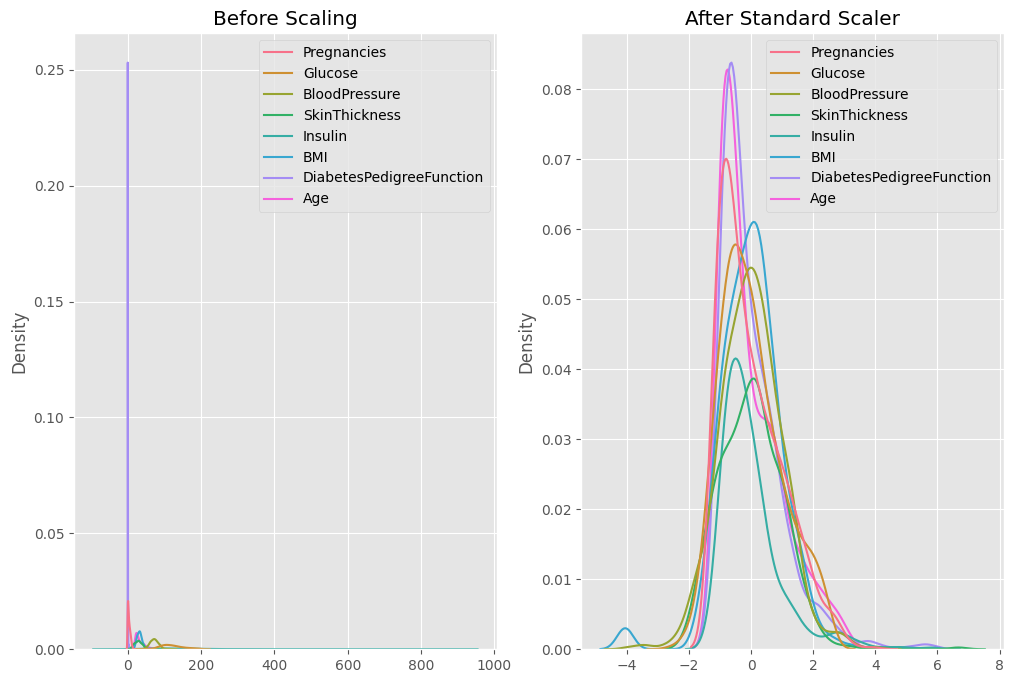

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df, ax=ax1)

ax2.set_title('After Standard Scaler')

sns.kdeplot(scaled_df, ax=ax2)



 plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_min=dataset.iloc[:,0:-1]
scaled_df_min = scaler.fit_transform(df_min)
scaled_df_min = pd.DataFrame(scaled_df_min, columns=col_names)

ValueError: ignored

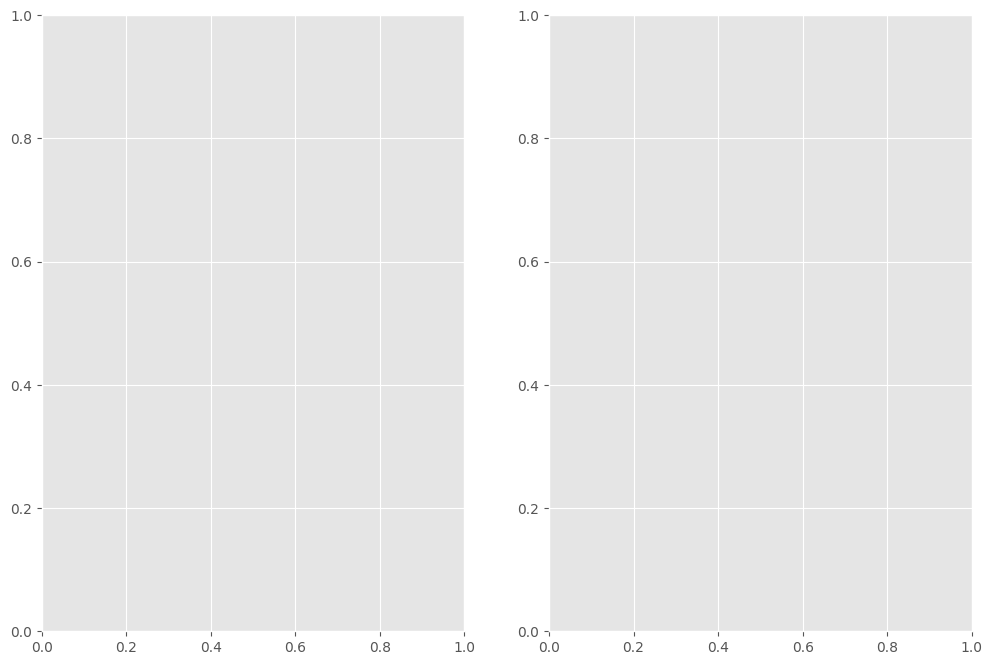

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=2, figsize=(12, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df_min, ax=ax1)

ax2.set_title('After MinMAXScaler Scaler')

sns.kdeplot(scaled_df_min, ax=ax2)

ax3.set_title('After StandardScaler Scaler')

sns.kdeplot(scaled_df, ax=ax3)



plt.show()

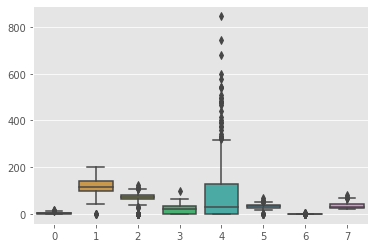

In [ ]:
sns.boxplot(data=df)

In [14]:
scaler = StandardScaler()
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
scaled_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df1=pd.DataFrame(transformed_values,columns=col_names)
df1.columns=col_names
df1=df1.iloc[:,0:-1]
scaled_df1 = scaler.fit_transform(df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=scaled_col_names)

In [ ]:
print (df1.columns.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8]


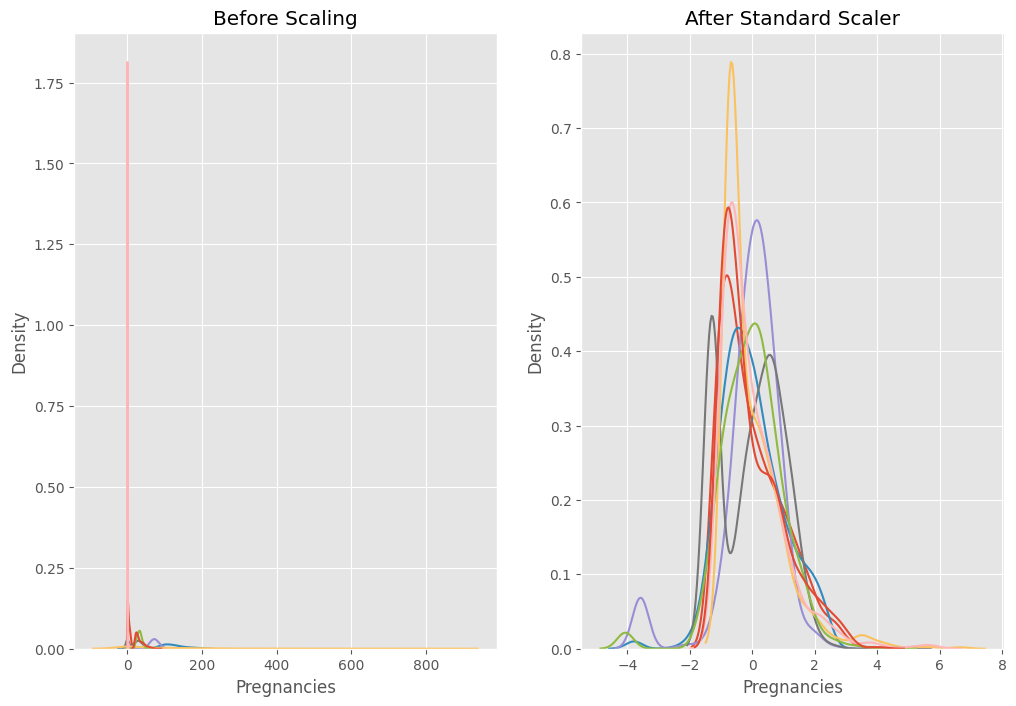

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df1['Pregnancies'], ax=ax1)
sns.kdeplot(df1['Glucose'], ax=ax1)
sns.kdeplot(df1['BloodPressure'], ax=ax1)
sns.kdeplot(df1['SkinThickness'], ax=ax1)
sns.kdeplot(df1['Insulin'], ax=ax1)
sns.kdeplot(df1['BMI'], ax=ax1)
sns.kdeplot(df1['DiabetesPedigreeFunction'], ax=ax1)
sns.kdeplot(df1['Age'], ax=ax1)

ax2.set_title('After Standard Scaler')

sns.kdeplot(scaled_df1['Pregnancies'], ax=ax2)
sns.kdeplot(scaled_df1['Glucose'], ax=ax2)
sns.kdeplot(scaled_df1['BloodPressure'], ax=ax2)
sns.kdeplot(scaled_df1['SkinThickness'], ax=ax2)
sns.kdeplot(scaled_df1['Insulin'], ax=ax2)
sns.kdeplot(scaled_df1['BMI'], ax=ax2)
sns.kdeplot(scaled_df1['DiabetesPedigreeFunction'], ax=ax2)
sns.kdeplot(scaled_df1['Age'], ax=ax2)

plt.show()